# Эксперименты для лабораторной работы "ODEs direction fields and approximations by ODE-Net"

A significant portion of processes can be described by differential equations: let it be evolution of physical systems, medical conditions of a patient, fundamental properties of markets, etc. Such data is sequential and continuous in its nature, meaning that observations are merely realizations of some continuously changing state.

There is also another type of sequential data that is discrete – NLP data, for example: its state changes discretely, from one symbol to another, from one word to another.

Today both these types are normally processed using recurrent neural networks. They are, however, essentially different in their nature, and it seems that they should be treated differently.

$$
\frac{dz}{dt} = f(z(t), t) \tag{1}
$$
$$
\{(z_0, t_0),(z_1, t_1),...,(z_M, t_M)\} - \text{observations}
$$




Here we use sympy library and plot direction fields and phase portraits for simple ODEs. Also we plot ODE-Net approximation for these ODEs.

In [1]:
from __future__ import division
import numpy as np

import matplotlib.pyplot as plt

from sympy import *
from sympy.plotting import plot
from sympy.plotting import plot_parametric
from sympy.abc import *
import sympy as sm

from scipy.integrate import odeint

import sys


spiral
---------- Declaration of general symbols and parameters ----------------
---------- Linear dynamical model definition ----------------
ODE linear system model:
 Eq(Derivative(x1(t), t), -x1(t) - 10*x2(t)) 
 Eq(Derivative(x2(t), t), 10*x1(t) - x2(t))
---------- Finding general solution (works for linear systems) ----------------
Solutions of the ODE system:
 Eq(x1(t), (-C1*sin(10*t) - C2*cos(10*t))*exp(-t)) 
 Eq(x2(t), (C1*cos(10*t) - C2*sin(10*t))*exp(-t))
---------- Critical points ----------------
[ 0.00,  0.00]
---------- Phase portrait: vector field ----------------


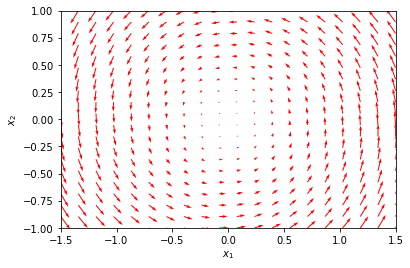

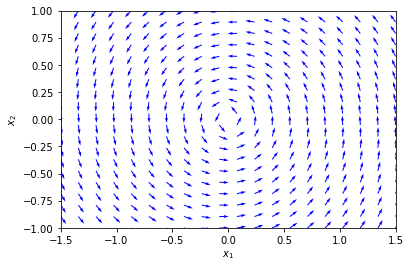

---------- Phase portrait: vector flow ----------------


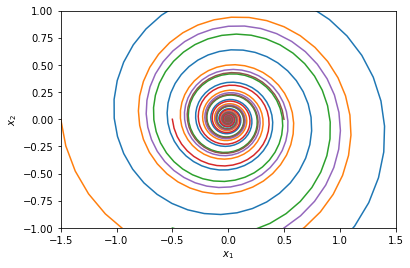

center
---------- Declaration of general symbols and parameters ----------------
---------- Linear dynamical model definition ----------------
ODE linear system model:
 Eq(Derivative(x1(t), t), x2(t)) 
 Eq(Derivative(x2(t), t), -x1(t))
---------- Finding general solution (works for linear systems) ----------------
Solutions of the ODE system:
 Eq(x1(t), C1*sin(t) + C2*cos(t)) 
 Eq(x2(t), C1*cos(t) - C2*sin(t))
---------- Critical points ----------------
[ 0.00,  0.00]
---------- Phase portrait: vector field ----------------


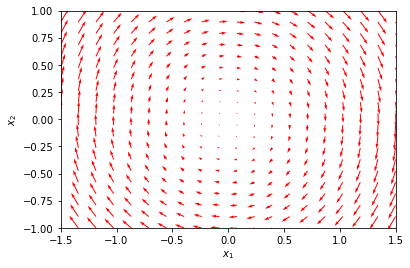

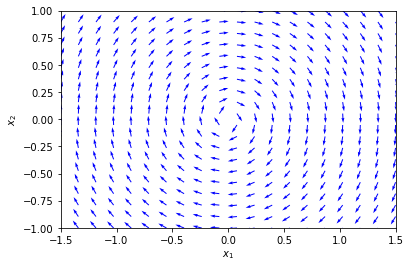

---------- Phase portrait: vector flow ----------------


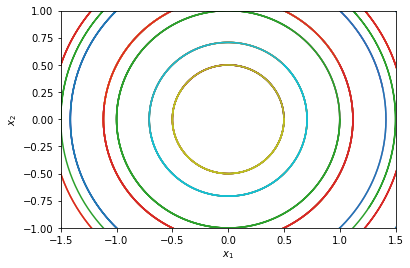

saddle
---------- Declaration of general symbols and parameters ----------------
---------- Linear dynamical model definition ----------------
ODE linear system model:
 Eq(Derivative(x1(t), t), -4*x1(t) - 3*x2(t)) 
 Eq(Derivative(x2(t), t), 2*x1(t) + 3*x2(t))
---------- Finding general solution (works for linear systems) ----------------
Solutions of the ODE system:
 Eq(x1(t), -3*C1*exp(-3*t) - C2*exp(2*t)/2) 
 Eq(x2(t), C1*exp(-3*t) + C2*exp(2*t))
---------- Critical points ----------------
[ 0.00,  0.00]
---------- Phase portrait: vector field ----------------


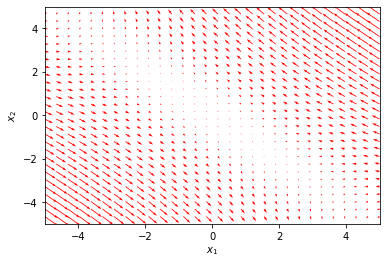

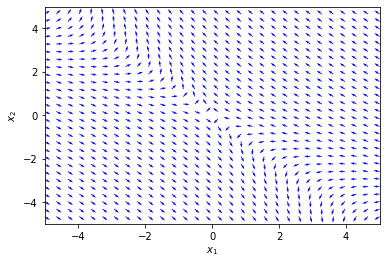

---------- Phase portrait: vector flow ----------------


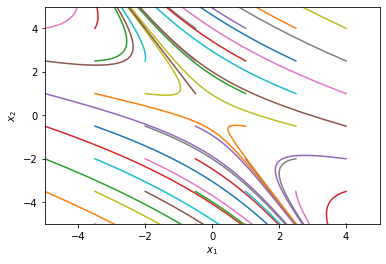

node
---------- Declaration of general symbols and parameters ----------------
---------- Linear dynamical model definition ----------------
ODE linear system model:
 Eq(Derivative(x1(t), t), 3*x1(t) + x2(t)) 
 Eq(Derivative(x2(t), t), 3*x2(t))
---------- Finding general solution (works for linear systems) ----------------
Solutions of the ODE system:
 Eq(x1(t), (C1 + C2*t)*exp(3*t)) 
 Eq(x2(t), C2*exp(3*t))
---------- Critical points ----------------
[ 0.00,  0.00]
---------- Phase portrait: vector field ----------------


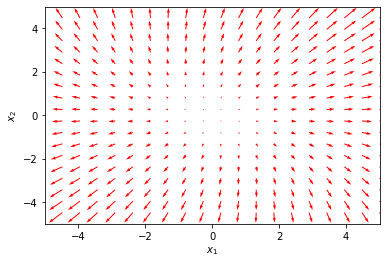

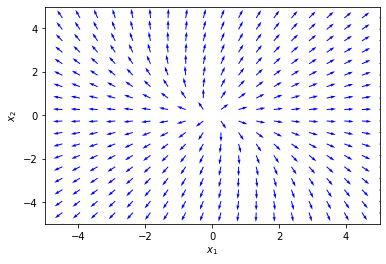

---------- Phase portrait: vector flow ----------------


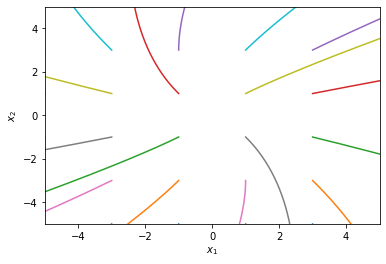

star
---------- Declaration of general symbols and parameters ----------------
---------- Linear dynamical model definition ----------------
ODE linear system model:
 Eq(Derivative(x1(t), t), -x1(t)) 
 Eq(Derivative(x2(t), t), -x2(t))
---------- Finding general solution (works for linear systems) ----------------
Solutions of the ODE system:
 Eq(x1(t), C1*exp(-t)) 
 Eq(x2(t), C2*exp(-t))
---------- Critical points ----------------
[ 0.00,  0.00]
---------- Phase portrait: vector field ----------------


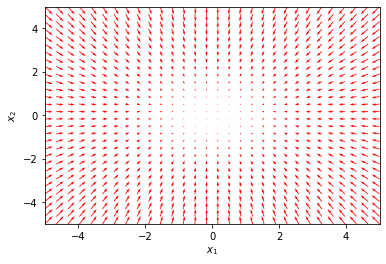

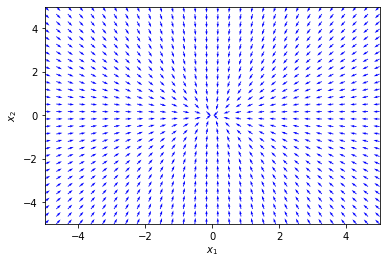

---------- Phase portrait: vector flow ----------------


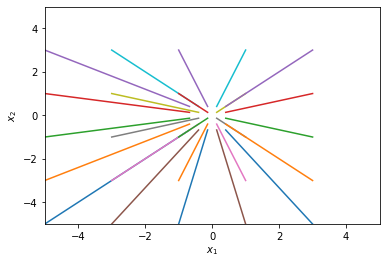

improper node
---------- Declaration of general symbols and parameters ----------------
---------- Linear dynamical model definition ----------------
ODE linear system model:
 Eq(Derivative(x1(t), t), -x1(t) + 2*x2(t)) 
 Eq(Derivative(x2(t), t), -x2(t))
---------- Finding general solution (works for linear systems) ----------------
Solutions of the ODE system:
 Eq(x1(t), (2*C1 + 2*C2*t)*exp(-t)) 
 Eq(x2(t), C2*exp(-t))
---------- Critical points ----------------
[ 0.00,  0.00]
---------- Phase portrait: vector field ----------------


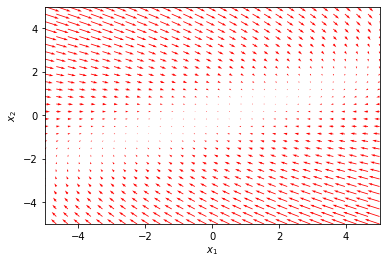

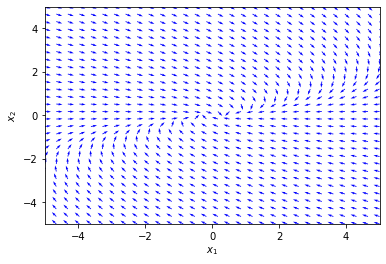

---------- Phase portrait: vector flow ----------------


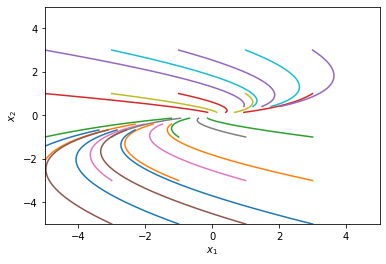

In [2]:
class DynamicalSystem():

    def __init__(self):

        print("---------- Declaration of general symbols and parameters ----------------")

        # In the case of linear system, the general form of the dynamical model is a 2x2 matrix A:
        # dx1/dt = a11*x1 + a12*x2 = f1(x1,x2)
        # dx2/dt = a21*x1 + a22*x2 = f1(x1,x2)
        # Solutions are in the form x1(t), x2(t)
        # (f1, f2) is the vector field, where the functions f1 and f2 are linear
        #
        # For a non-linear model:
        # dx1/dt = f1(x1, x2)
        # dx2/dt = f2(x1, x2)
        # Solutions are in the form x1(t), x2(t)
        # (f1, f2) is the vector field, where the functions f1 and f2 are generically non-linear

        # Declaration of the symbols that are used to derive a solution and manipulate the dynamical model
        self.x1, self.x2 = sm.symbols("x1 x2", cls=Function, Function=True)  # solution functions x1(t), x2(t)
        self._x1, self._x2 = sm.symbols('self._x1, self._x2', negative=False)  # state variables (x1, x2)

        self.t = sm.symbols('t')  # time parameter

        self.C1, self.C2 = sm.symbols('C1 C2')  # C1 and C2 are integration constants

        # Linear model matrix A: an empty 2x2 matrix of type sm.Matrix is created
        #
        self.A = zeros(2)

        # A number of general parameters need to be specified, that are used
        # at plotting time, to show vector fields and vector flows in the phase portraits.
        # Each dynamical model is better shown using model-specific
        # parameter values for the ranges of the (x1,x2) points, as well as of the time.
        # The values used below are just general reasonable default values that can / should
        # be changed when the model is instantiated in linear_model() and nonlinear_model() methods.
        #
        # The time_span parameter is used to plot trajectories from t=0 to t=timespan.
        # The selected ranges for x1 and x2 (xmin / xmax) are used to define for which
        # (x1, x2) points the behavior of the system is shown.
        # The parameters numx1 and numx2 are the number of plotted points along each axis.
        #
        self.time_span = 1
        self.trajectory_pts = 200
        self.x1min = -1.5;
        self.x1max = 1.5;
        self.x1step = 0.5;
        self.x2min = -1.0;
        self.x2max = 1.0;
        self.x2step = 0.5;
        self.numx1 = 20;
        self.numx2 = 20;

        init_printing()  # useful if some advanced printing properties of SymPy are going to be used ...

    def linear_model(self, model_type="spiral"):
        #
        print("---------- Linear dynamical model definition ----------------")
        #
        # Calling this method allows to set up a specific linear dynamical system model, both
        # in terms of its numeric coefficient matrix A and as a symbolic system of differential equations.
        # A list of a few example models are available and selectable using argument "model_type".
        # If a new model is needed, it must be added below, in the body of the "else" statement.

        # For each model instance, are specified: the coefficients of the model matrix A,
        # the time/space parameters for visualization of the phase portraits (feel free to change them)
        #

        if model_type == "spiral":
            # Spiral
            # a11 = -1; a12 = -10; a21 = 10; a22 = -1
            self.A = sm.Matrix([[-1, -10], [10, -1]])
            self.time_span = 5
            self.trajectory_pts = 300
            self.x1min = -1.5;
            self.x1max = 1.5;
            self.x1step = 0.5;
            self.x2min = -1.0;
            self.x2max = 1.0;
            self.x2step = 0.5;
            self.numx1 = 20;
            self.numx2 = 20;

        elif model_type == "center":
            self.A = sm.Matrix([[0, 1], [-1, -0]])
            self.time_span = 10
            self.trajectory_pts = 250
            self.x1min = -1.5;
            self.x1max = 1.5;
            self.x1step = 0.25;
            self.x2min = -1.0;
            self.x2max = 1.0;
            self.x2step = 0.25;
            self.numx1 = 20;
            self.numx2 = 20;

        elif model_type == "saddle":
            self.A = sm.Matrix([[-4, -3], [2, 3]])
            self.time_span = 10
            self.trajectory_pts = 400
            self.x1min = -5;
            self.x1max = 5;
            self.x1step = 0.75;
            self.x2min = -5;
            self.x2max = 5;
            self.x2step = 0.75;
            self.numx1 = 30;
            self.numx2 = 30;

        elif model_type == "node":
            self.A = sm.Matrix([[3, 1], [0, 3]])
            self.time_span = 1
            self.trajectory_pts = 300
            self.x1min = -5;
            self.x1max = 5;
            self.x1step = 1;
            self.x2min = -5;
            self.x2max = 5;
            self.x2step = 1;
            self.numx1 = 20;
            self.numx2 = 20;

        elif model_type == "star":
            self.A = sm.Matrix([[-1, 0], [0, -1]])
            self.time_span = 2
            self.trajectory_pts = 400
            self.x1min = -5;
            self.x1max = 5;
            self.x1step = 1;
            self.x2min = -5;
            self.x2max = 5;
            self.x2step = 1;
            self.numx1 = 30;
            self.numx2 = 30;

        elif model_type == "improper node":
            self.A = sm.Matrix([[-1, 2], [0, -1]])
            self.time_span = 2
            self.trajectory_pts = 400
            self.x1min = -5;
            self.x1max = 5;
            self.x1step = 1;
            self.x2min = -5;
            self.x2max = 5;
            self.x2step = 1;
            self.numx1 = 30;
            self.numx2 = 30;

        # Using the above model specification (the matrix A) a symbolic representation of
        # the system of differential equations is created. Once defined the matrix A above,
        # the rest of the method doesn't need any further edit.
        #
        # diff(x1(t), t) represents dx1/dt, # diff(x2(t), t) represents dx2/dt,
        # Together, they fully specifies the vector field associated to A
        #
        self.f1 = sm.Eq(diff(self.x1(t), self.t), self.A[0] * self.x1(self.t) + self.A[1] * self.x2(self.t))
        self.f2 = sm.Eq(diff(self.x2(t), self.t), self.A[2] * self.x1(self.t) + self.A[3] * self.x2(self.t))
        #
        # if we would remove the 'self' parts a more readable form would be obtained:
        # f1 = sm.Eq(diff(x1(t), t), A[0]*x1(t) + A[1]*x2(t))
        # f2 = sm.Eq(diff(x2(t), t), A[2]*x1(t) + A[3]*x2(t))

        print("ODE linear system model:\n", self.f1, "\n", self.f2)

        # Symbolic system of equations representing only the vector field
        # This is used to find the critical points
        # Note that in this case there's no dependence on t (that is necessary for describing the flows)
        # The symbolic variables are _x1, _x2, that represent the state variables
        #
        self.X1 = self.A[0] * self._x1 + self.A[1] * self._x2
        self.X2 = self.A[2] * self._x1 + self.A[3] * self._x2

        # The symbolic model definitions X1, X2, are "lambdifyied"
        # to efficiently compute the values and treat them as a numeric function.
        # This is not used in this method, but rather in the vector_field() method
        #
        self.X1lambdaLin = lambdify((self._x1, self._x2), self.X1, "numpy")
        self.X2lambdaLin = lambdify((self._x1, self._x2), self.X2, "numpy")
        
    def nonlinear_model_prey_predator(self):
        #
        # Definition of a non-linear model of a dynamical system. The model is fully specified
        # both as a symbolic system of equations, and as a numeric system of functions.
        # Since each non-linear model is specified by a different set of equations, it's not possible
        # to provide a general form, but only specific guiding examples.

        # The symbolic model could be of limited use in the case of non-linear systems since
        # it may be too diffult to use it for finding an analytic solution (using SymPy).
        # In any case, this method is also used to assign a number of parameters that are necessary
        # for the study of the non-linear model.
        #
        print("---------- Non-Linear dynamical model definition: Prey-Predator ----------------")
        #
        # Prey-Predator, Lotka-Volterra model

        # parameters of the model
        #
        self.growth_prey = 1
        self.death_pred = 3 / 4
        self.interact_predprey = 1 / 2
        self.interact_preypred = 1 / 4

        # Symbolic system of differential equations. The formalism is analogous to the linear case.
        #
        self.f1 = sm.Eq(diff(self.x1(t), self.t),
                        self.x1(self.t) * (self.growth_prey - self.interact_predprey * self.x2(self.t)))

        self.f2 = sm.Eq(diff(self.x2(t), self.t),
                        self.x2(self.t) * (-self.death_pred + self.interact_preypred * self.x1(self.t)))

        print("[Competing populations] ODE non-linear system model:\n", self.f1, "\n", self.f2)

        # Symbolic system of equations representing only the vector field
        # This is used to derive the Jacobian and to find the critical points
        # Note that in this case there's no dependence on t (that is necessary for describing the flows)
        #
        self.X1 = self._x1 * (self.growth_prey - self.interact_predprey * self._x2)
        self.X2 = self._x2 * (-self.death_pred + self.interact_preypred * self._x1)

        # The symbolic model definitions X1, X2, are "lambdifyied"
        # to efficiently compute the values and treat them as a numeric function.
        # This is not used in this method, but rather in the vector_field() method
        #
        self.X1lambdaNonLin = lambdify((self._x1, self._x2), self.X1, "numpy")
        self.X2lambdaNonLin = lambdify((self._x1, self._x2), self.X2, "numpy")

        # parameters for studying and plotting / representing the model
        self.time_span = 10
        self.trajectory_pts = 120
        self.x1min = 0.0;
        self.x1max = 9;
        self.x1step = 0.5;
        self.x2min = 0.0;
        self.x2max = 7;
        self.x2step = 0.5;
        self.numx1 = 20;
        self.numx2 = 20;

    def nonlinear_model_eval(self, X, t):
        # The function computes the value of the model for the given point
        # X corresponds to a specific point in the phase space, X = (x1, x2)
        # The function exploits the lambdifyied version of the vector fields
        # defined in the model method
        #
        # print "---------- Numeric model evaluation ----------------"
        #

        f1 = self.X1lambdaNonLin(X[0], X[1])
        f2 = self.X2lambdaNonLin(X[0], X[1])

        # print "Model value in (x1=%5.2f, x2=%5.2f): (%5.2f, %5.2f)\n" % (X[0], X[1], f1, f2)
        # print ""

        return [f1, f2]

    def general_solution_symbolic(self, f1, f2):
        #
        print("---------- Finding general solution (works for linear systems) ----------------")
        #
        # Solution of the system, ODEsol is tuple [x1(t), x2(t)] in symbolic form
        #
        self.ODEsol = sm.dsolve((f1, f2))
        print("Solutions of the ODE system:\n", self.ODEsol[0], "\n", self.ODEsol[1])

    def numeric_solutions_and_system_flows(self):
        print("---------- Finding and plotting solutions in numeric form (for non linear systems) --------------")

        plt.figure("Flows (numeric solutions)")
        plt.xlabel('$x_1$')
        plt.ylabel('$x_2$')
        plt.xlim([self.x1min, self.x1max])
        plt.ylim([self.x2min, self.x2max])

        for x1_0 in np.arange(self.x1min, self.x1max, 2 * self.x1step):
            for x2_0 in np.arange(self.x2min, self.x2max, 2 * self.x2step):
                # this defines the range for the time parameter and the number of points: trajectories will
                # represent the range [0 : timespan] using trajectory_pts points equally spaced
                #
                timespan = np.linspace(0, self.time_span, self.trajectory_pts)
                Xsol = odeint(self.nonlinear_model_eval, [x1_0, x2_0], timespan)

                plt.plot(Xsol[:, 0], Xsol[:, 1], 'b-')  # trajectory path, blue
                plt.plot([Xsol[0,0]], [Xsol[0,1]], 'o') # trajectory start, circle
                plt.plot([Xsol[-1,0]], [Xsol[-1,1]], 's') # trajectory end, square

        #plt.ioff()
        plt.show()  # keep the window open
        plt.savefig('./flows-non-linear.png')

    def eigenspaces(self, M):
        # The argument M is a matrix representing a linear system, likely self.A
        #
        print("---------- Eigenanalysis ----------------")
        #
        # Stability study requires eigenvalues and eigenvectors
        #
        print("Determinant: %8.3f" % M.det())
        # print "Null space", M.nullspace()

        print("Eigenvalues:", M.eigenvals())

        #eigenvalues can be real or complex number, print them in a different format accordingly
        for (e, m) in M.eigenvals().items():
            if sm.im(e) == 0:
                print("\teigenvalue: %5.2f  multiplicity: %d" % (e, m))
            else:
                if sm.im(e) < 0:
                    print("\teigenvalue: %5.2f %5.2fi  multiplicity: %d" % (sm.re(e), sm.im(e), m))
                else:
                    print("\teigenvalue: %5.2f + %5.2fi  multiplicity: %d" % (sm.re(e), sm.im(e), m))

        print("Eigenvectors:")
        for (e, m, v) in M.eigenvects():
            if sm.im(e) == 0:
                print("\t[%5.2f,%5.2f] <- eigenvalue %5.2f" % (v[0][0], v[0][1], e))
            else:
                print("\t[(%5.2f,%5.2f), (%5.2f,%5.2f)] <- eigenvalue %5.2f + %5.2fi" % (
                sm.re(v[0][0]), sm.im(v[0][0]), sm.re(v[0][1]), sm.im(v[0][1]), sm.re(e), sm.im(e)))
    def critical_points(self, X1, X2, system_type):
        print("---------- Critical points ----------------")
        #
        # This method finds  the critical points.

        # Setting equations to zero
        X1Eq = sm.Eq(X1, 0)
        X2Eq = sm.Eq(X2, 0)

        # Compute critical points
        if system_type == "linear":
            critical_pts = sm.linsolve((X1Eq, X2Eq), self._x1, self._x2)
        else:
            critical_pts = sm.solve((X1Eq, X2Eq), self._x1, self._x2)

        for (cx, cy) in critical_pts:
            print("[%5.2f, %5.2f]" % (cx, cy))

        return critical_pts

    def def_Jacobian_matrix(self, VF1, VF2):
        # The arguments are the two components of a (non-linear) vector field
        #
        print("---------- Definition of Jacobian matrix ----------------")
        #

        F = sm.Matrix([VF1, VF2])
        # print "F: ", F

        self.Jsymb = F.jacobian([self._x1, self._x2])

        # print "Jacobian matrix:\n", self.J
        # print
        # "Jacobian matrix:\n", "\t", self.Jsymb[0, 0], "\t\t", self.Jsymb[0, 1], "\n\t", self.Jsymb[1, 0], "\t\t", \
        # self.Jsymb[1, 1]
        # print

    def Jacobian_eval(self, J, coord):
        # value of the Jacobian in the specified point (x1coord, x2coord)
        x1coord = coord[0]
        x2coord = coord[1]

        print("---------- Jacobian evaluation ----------------")

        j_x1x2 = J.subs([(self._x1, x1coord), (self._x2, x2coord)])

        print("Jacobian at coordinates (%5.2f, %5.2f)" % (x1coord, x2coord))
        print("\t %5.2f \t %5.2f\n\t %5.2f \t %5.2f" % (j_x1x2[0, 0], j_x1x2[0, 1], j_x1x2[1, 0], j_x1x2[1, 1]))

        return j_x1x2

    def vector_field(self, VectorFieldX1, VectorFieldX2):
        # The arguments VectorFieldX1 and VectorFieldX2 are lambdifyed versions of the vector field
        # of the model. They are set up in the critical_points() method, but are passed as an argument
        # leaving more flexibility defining them
        #
        #
        print("---------- Phase portrait: vector field ----------------")
        #
        # To generate the phase portrait, we need to use the derivatives dx1/dt and
        # dx2/dt at t=0 on a grid over the range of values for x1 and x2 we are
        # interested in. That is, we need to compute the vector field F=(u,v):
        # a vector (u,v) at each (x1, x2) that shows the tangent direction of the
        # (unique) trajectory passing by the point.

        _x1points = np.linspace(self.x1min, self.x1max, self.numx1)
        _x2points = np.linspace(self.x2min, self.x2max, self.numx2)

        # a regular meshgrid is defined over the selected ranges in the phase space
        X1grid, X2grid = np.meshgrid(_x1points, _x2points)

        # init the vector field arrays u and v to correct dimensions and to zeros
        # (un, vn) are used to represent a normalized vector field (all vectors have same length)
        #
        u, v = np.zeros(X1grid.shape), np.zeros(X2grid.shape)
        un, vn = np.zeros(X1grid.shape), np.zeros(X2grid.shape)

        # compute the value of the vector field over the selected grid points using the lambdifyied
        # versions of the model equations
        #
        for i in range(self.numx1):
            for j in range(self.numx2):
                x1coord = X1grid[i, j]  # from grid to cartesian coordinates
                x2coord = X2grid[i, j]

                # unnormalized (regular) vector field: vectors have length proportional to the norm
                u[i, j] = VectorFieldX1(x1coord, x2coord)
                v[i, j] = VectorFieldX2(x1coord, x2coord)

                # normalized: all vectors have same length (maybe it's more readable, but less info)
                norm = np.sqrt(u[i, j] ** 2.0 + v[i, j] ** 2.0)
                if norm > 0:
                    un[i, j] = u[i, j] / np.sqrt(u[i, j] ** 2.0 + v[i, j] ** 2.0)
                    vn[i, j] = v[i, j] / np.sqrt(u[i, j] ** 2.0 + v[i, j] ** 2.0)
                else:
                    un[i, j] = 0.0
                    vn[i, j] = 0.0

        # plot the arrows representing the vector field (u,v) (and the normalized version) in
        # the selected grid points X1grid, X2grid using the function quiver()
        #

        plt.figure("Vector field")
        plt.xlabel('$x_1$')
        plt.ylabel('$x_2$')
        plt.xlim([self.x1min, self.x1max])
        plt.ylim([self.x2min, self.x2max])

        plt.quiver(X1grid, X2grid, u, v, color='r')
        plt.savefig('vector-field.png')
        #plt.ioff()
        plt.show()

        plt.figure("Vector field (uniform vector length)")
        plt.xlabel('$x_1$')
        plt.ylabel('$x_2$')
        plt.xlim([self.x1min, self.x1max])
        plt.ylim([self.x2min, self.x2max])

        plt.quiver(X1grid, X2grid, un, vn, color='b')
        plt.savefig('vector-field-uniform.png')
        #plt.ioff()
        plt.show()

    def vector_flow_linear(self, X1sol, X2sol):
        #
        print("---------- Phase portrait: vector flow ----------------")
        #
        # Selection of a set of specific trajectories by assigning initial conditions
        # In turn, this allows to set the values for the integration constants in the general sol
        # The multiple parametric trajectories are plotted in the same phase portrait
        #
        flows_fig = plt.figure("Flows")
        ax = flows_fig.add_subplot(111)  # creates one plot that will include all selected trajectories
        plt.xlim([self.x1min, self.x1max])
        plt.ylim([self.x2min, self.x2max])

        for x1_0 in np.arange(self.x1min, self.x1max, 2 * self.x1step):
            for x2_0 in np.arange(self.x2min, self.x2max, 2 * self.x2step):

                #                trajectory_constants = sm.solve( (self.ODEsol[0].subs(self.t,0).subs(self.x1(0), x1_0),
                #                                                  self.ODEsol[1].subs(self.t,0).subs(self.x2(0), x2_0)),
                #                                                 {self.C1, self.C2})
                trajectory_constants = sm.solve((X1sol.subs(self.t, 0).subs(self.x1(0), x1_0),
                                                 X2sol.subs(self.t, 0).subs(self.x2(0), x2_0)),
                                                {self.C1, self.C2})
                #
                # subs method substitutes symbol t with 0, and x1(0), x2(0) with the selected
                # initial conditions, the result is used to solve with respect to the integration
                # constants C1 and C2 (previously declared as symbols)

                show_parametric_equations = False

                if show_parametric_equations:
                    print("Integration constants from initial conditions (%5.2f, %5.2f):" % (x1_0, x2_0))
                    print(trajectory_constants)

                # Solution (in symbolic form) for the selected trajectory
                # two (parametric) equations dependending on t
                #
                x1trajectory = sm.expand(self.ODEsol[0].rhs.subs(trajectory_constants))
                x2trajectory = sm.expand(self.ODEsol[1].rhs.subs(trajectory_constants))

                if show_parametric_equations:
                    print("Solution trajectory in the (x1, x2) phase space:")
                    print("x1(t)=", x1trajectory, "    x2(t)=", x2trajectory)

                # found trjectories are in symbolic form, in order to use them to generate a set of points
                # to be plotted, they need to be lambdifyied, in order to have numeric type of functions
                x1t_numeric = lambdify(self.t, x1trajectory, "numpy")
                x2t_numeric = lambdify(self.t, x2trajectory, "numpy")

                # this defines the range for the time parameter and the number of points: trajectories will
                # represent the range [0 : timespan] using trajectory_pts points equally spaced
                timespan = np.linspace(0, self.time_span, self.trajectory_pts)
                x1t_pts = x1t_numeric(timespan)
                x2t_pts = x2t_numeric(timespan)

                ax.plot(x1t_pts, x2t_pts)

        plt.xlabel('$x_1$')
        plt.ylabel('$x_2$')

        #plt.ioff()
        plt.show()  # keep the window open
        flows_fig.savefig('./vector-flow-linear.png')


if __name__ == '__main__':

    linear = True  # False #
    nonlinear =  False #

    # Linear system analysis
    #
    if linear == True:
        for type in ['spiral', 'center', 'saddle', 'node', 'star', 'improper node']:
            print(type)
            DSLin = DynamicalSystem()

            DSLin.linear_model(type)  # set up the model

            DSLin.general_solution_symbolic(DSLin.f1, DSLin.f2)  # find solutions x(t)

            DSLin.critical_points(DSLin.X1,
                                  DSLin.X2,
                                  "linear")  # non necessary for non degenerate A

           # DSLin.eigenspaces(DSLin.A)  # eigenanalysis of the origin

            DSLin.vector_field(DSLin.X1lambdaLin,
                               DSLin.X2lambdaLin)  # compute and plot vector field

            DSLin.vector_flow_linear(DSLin.ODEsol[0],
                                     DSLin.ODEsol[1])  # plot trajectory flows



    # Non-Linear system analysis
    #
    if nonlinear == True:
        DSNonLin = DynamicalSystem()

        DSNonLin.nonlinear_model_prey_predator()  # set up the model
        # DSNonLin.nonlinear_model_competing_species()

        # DSn.general_solution_symbolic(DS.f1, DS.f2)               # attempt finding general sol

        critical_points = DSNonLin.critical_points(DSNonLin.X1,
                                                   DSNonLin.X2,
                                                   "non-linear")  # find critical points
        print(critical_points)
        DSNonLin.vector_field(DSNonLin.X1lambdaNonLin,
                              DSNonLin.X2lambdaNonLin)  # compute and plot vector field

        DSNonLin.numeric_solutions_and_system_flows()  # numeric solutions and trajectory flows

        DSNonLin.def_Jacobian_matrix(DSNonLin.X1, DSNonLin.X2)  # define general Jacobian matrix

        for cp in critical_points:
            coord = [cp[0], cp[1]]
            J = DSNonLin.Jacobian_eval(DSNonLin.Jsymb, coord)  # evaluate Jacobian in each critical point
            DSNonLin.eigenspaces(J)  # eigenanalysis of the Jacobian

        plt.close('all')

In [21]:
import math
import numpy as np
from IPython.display import clear_output
from tqdm import tqdm_notebook as tqdm

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.color_palette("bright")
import matplotlib as mpl
import matplotlib.cm as cm

import torch
from torch import Tensor
from torch import nn
from torch.nn  import functional as F 
from torch.autograd import Variable

use_cuda = torch.cuda.is_available()

In [22]:
def ode_solve(z0, t0, t1, f):
    """
    Simplest Euler ODE initial value solver
    """
    h_max = 0.05
    n_steps = math.ceil((abs(t1 - t0)/h_max).max().item())

    h = (t1 - t0)/n_steps
    t = t0
    z = z0

    for i_step in range(n_steps):
        z = z + h * f(z, t)
        t = t + h
    return z

In [5]:
class ODEF(nn.Module):
    def forward_with_grad(self, z, t, grad_outputs):
        """Compute f and a df/dz, a df/dp, a df/dt"""
        batch_size = z.shape[0]

        out = self.forward(z, t)

        a = grad_outputs
        adfdz, adfdt, *adfdp = torch.autograd.grad(
            (out,), (z, t) + tuple(self.parameters()), grad_outputs=(a),
            allow_unused=True, retain_graph=True
        )
        # метод grad автоматически суммирует градие*н*ты для всех элементов батча, надо expand их обратно 
        if adfdp is not None:
            adfdp = torch.cat([p_grad.flatten() for p_grad in adfdp]).unsqueeze(0)
            adfdp = adfdp.expand(batch_size, -1) / batch_size
        if adfdt is not None:
            adfdt = adfdt.expand(batch_size, 1) / batch_size
        return out, adfdz, adfdt, adfdp

    def flatten_parameters(self):
        p_shapes = []
        flat_parameters = []
        for p in self.parameters():
            p_shapes.append(p.size())
            flat_parameters.append(p.flatten())
        return torch.cat(flat_parameters)

In [23]:
class ODEF(nn.Module):
    def forward_with_grad(self, z, t, grad_outputs):
        """Compute f and a df/dz, a df/dp, a df/dt"""
        batch_size = z.shape[0]

        out = self.forward(z, t)

        a = grad_outputs
        adfdz, adfdt, *adfdp = torch.autograd.grad(
            (out,), (z, t) + tuple(self.parameters()), grad_outputs=(a),
            allow_unused=True, retain_graph=True
        )
        # grad method automatically sums gradients for batch items, we have to expand them back 
        if adfdp is not None:
            adfdp = torch.cat([p_grad.flatten() for p_grad in adfdp]).unsqueeze(0)
            adfdp = adfdp.expand(batch_size, -1) / batch_size
        if adfdt is not None:
            adfdt = adfdt.expand(batch_size, 1) / batch_size
        return out, adfdz, adfdt, adfdp

    def flatten_parameters(self):
        p_shapes = []
        flat_parameters = []
        for p in self.parameters():
            p_shapes.append(p.size())
            flat_parameters.append(p.flatten())
        return torch.cat(flat_parameters)

In [24]:
class ODEAdjoint(torch.autograd.Function):
    @staticmethod
    def forward(ctx, z0, t, flat_parameters, func):
        assert isinstance(func, ODEF)
        bs, *z_shape = z0.size()
        time_len = t.size(0)

        with torch.no_grad():
            z = torch.zeros(time_len, bs, *z_shape).to(z0)
            z[0] = z0
            for i_t in range(time_len - 1):
                z0 = ode_solve(z0, t[i_t], t[i_t+1], func)
                z[i_t+1] = z0

        ctx.func = func
        ctx.save_for_backward(t, z.clone(), flat_parameters)
        return z

    @staticmethod
    def backward(ctx, dLdz):
        """
        dLdz shape: time_len, batch_size, *z_shape
        """
        func = ctx.func
        t, z, flat_parameters = ctx.saved_tensors
        time_len, bs, *z_shape = z.size()
        n_dim = np.prod(z_shape)
        n_params = flat_parameters.size(0)

        # Dynamics of augmented system to be calculated backwards in time
        def augmented_dynamics(aug_z_i, t_i):
            """
            tensors here are temporal slices
            t_i - is tensor with size: bs, 1
            aug_z_i - is tensor with size: bs, n_dim*2 + n_params + 1
            """
            z_i, a = aug_z_i[:, :n_dim], aug_z_i[:, n_dim:2*n_dim]  # ignore parameters and time

            # Unflatten z and a
            z_i = z_i.view(bs, *z_shape)
            a = a.view(bs, *z_shape)
            with torch.set_grad_enabled(True):
                t_i = t_i.detach().requires_grad_(True)
                z_i = z_i.detach().requires_grad_(True)
                func_eval, adfdz, adfdt, adfdp = func.forward_with_grad(z_i, t_i, grad_outputs=a)  # bs, *z_shape
                adfdz = adfdz.to(z_i) if adfdz is not None else torch.zeros(bs, *z_shape).to(z_i)
                adfdp = adfdp.to(z_i) if adfdp is not None else torch.zeros(bs, n_params).to(z_i)
                adfdt = adfdt.to(z_i) if adfdt is not None else torch.zeros(bs, 1).to(z_i)

            # Flatten f and adfdz
            func_eval = func_eval.view(bs, n_dim)
            adfdz = adfdz.view(bs, n_dim) 
            return torch.cat((func_eval, -adfdz, -adfdp, -adfdt), dim=1)

        dLdz = dLdz.view(time_len, bs, n_dim)  # flatten dLdz for convenience
        with torch.no_grad():
            ## Create placeholders for output gradients
            # Prev computed backwards adjoints to be adjusted by direct gradients
            adj_z = torch.zeros(bs, n_dim).to(dLdz)
            adj_p = torch.zeros(bs, n_params).to(dLdz)
            # In contrast to z and p we need to return gradients for all times
            adj_t = torch.zeros(time_len, bs, 1).to(dLdz)

            for i_t in range(time_len-1, 0, -1):
                z_i = z[i_t]
                t_i = t[i_t]
                f_i = func(z_i, t_i).view(bs, n_dim)

                # Compute direct gradients
                dLdz_i = dLdz[i_t]
                dLdt_i = torch.bmm(torch.transpose(dLdz_i.unsqueeze(-1), 1, 2), f_i.unsqueeze(-1))[:, 0]

                # Adjusting adjoints with direct gradients
                adj_z += dLdz_i
                adj_t[i_t] = adj_t[i_t] - dLdt_i

                # Pack augmented variable
                aug_z = torch.cat((z_i.view(bs, n_dim), adj_z, torch.zeros(bs, n_params).to(z), adj_t[i_t]), dim=-1)

                # Solve augmented system backwards
                aug_ans = ode_solve(aug_z, t_i, t[i_t-1], augmented_dynamics)

                # Unpack solved backwards augmented system
                adj_z[:] = aug_ans[:, n_dim:2*n_dim]
                adj_p[:] += aug_ans[:, 2*n_dim:2*n_dim + n_params]
                adj_t[i_t-1] = aug_ans[:, 2*n_dim + n_params:]

                del aug_z, aug_ans

            ## Adjust 0 time adjoint with direct gradients
            # Compute direct gradients 
            dLdz_0 = dLdz[0]
            dLdt_0 = torch.bmm(torch.transpose(dLdz_0.unsqueeze(-1), 1, 2), f_i.unsqueeze(-1))[:, 0]

            # Adjust adjoints
            adj_z += dLdz_0
            adj_t[0] = adj_t[0] - dLdt_0
        return adj_z.view(bs, *z_shape), adj_t, adj_p, None

In [25]:
class NeuralODE(nn.Module):
    def __init__(self, func):
        super(NeuralODE, self).__init__()
        assert isinstance(func, ODEF)
        self.func = func

    def forward(self, z0, t=Tensor([0., 1.]), return_whole_sequence=False):
        t = t.to(z0)
        z = ODEAdjoint.apply(z0, t, self.func.flatten_parameters(), self.func)
        if return_whole_sequence:
            return z
        else:
            return z[-1]

In [26]:
class LinearODEF(ODEF):
    def __init__(self, W):
        super(LinearODEF, self).__init__()
        self.lin = nn.Linear(2, 2, bias=False)
        self.lin.weight = nn.Parameter(W)

    def forward(self, x, t):
        return self.lin(x)

In [27]:
class SpiralFunctionExample(LinearODEF):
    def __init__(self):
        super(SpiralFunctionExample, self).__init__(Tensor([[-0.1, -1.], [1., -0.1]]))

In [28]:
class CenterFunctionExample(LinearODEF):
    def __init__(self):
        super(CenterFunctionExample, self).__init__(Tensor([[0., -1.], [1., 0.]]))

In [29]:
class SaddleFunctionExample(LinearODEF):
    def __init__(self):
        super(SaddleFunctionExample, self).__init__(torch.randn(2, 2)/2.)

In [30]:
class RandomLinearODEF(LinearODEF):
    def __init__(self):
        super(RandomLinearODEF, self).__init__(torch.randn(2, 2)/2.)

In [31]:
def plot_trajectories(obs=None, times=None, trajs=None, save=None, figsize=(16, 8)):
    plt.figure(figsize=figsize)
    if obs is not None:
        if times is None:
            times = [None] * len(obs)
        for o, t in zip(obs, times):
            o, t = to_np(o), to_np(t)
            for b_i in range(o.shape[1]):
                plt.scatter(o[:, b_i, 0], o[:, b_i, 1])

    if trajs is not None: 
        for z in trajs:
            z = to_np(z)
            plt.plot(z[:, 0, 0], z[:, 0, 1], lw=1.5)
        if save is not None:
            plt.savefig(save)
    plt.show()

In [32]:
def conduct_experiment(ode_true,ode_trained, n_steps, name, plot_freq=10):
    # Create data
    z0 = Variable(torch.Tensor([[0.6, 0.3]]))

    t_max = 6.29*5
    n_points = 200

    index_np = np.arange(0, n_points, 1, dtype=np.int)
    index_np = np.hstack([index_np[:, None]])
    times_np = np.linspace(0, t_max, num=n_points)
    times_np = np.hstack([times_np[:, None]])

    times = torch.from_numpy(times_np[:, :, None]).to(z0)
    obs = ode_true(z0, times, return_whole_sequence=True).detach()
    obs = obs + torch.randn_like(obs) * 0.01

    # Get trajectory of random timespan 
    min_delta_time = 1.0
    max_delta_time = 5.0
    max_points_num = 32
    def create_batch():
        t0 = np.random.uniform(0, t_max - max_delta_time)
        t1 = t0 + np.random.uniform(min_delta_time, max_delta_time)

        idx = sorted(np.random.permutation(index_np[(times_np > t0) & (times_np < t1)])[:max_points_num])

        obs_ = obs[idx]
        ts_ = times[idx]
        return obs_, ts_

    # Train Neural ODE
    optimizer = torch.optim.Adam(ode_trained.parameters(), lr=0.01)
    for i in range(n_steps):
        obs_, ts_ = create_batch()

        z_ = ode_trained(obs_[0], ts_, return_whole_sequence=True)
        loss = F.mse_loss(z_, obs_.detach())

        optimizer.zero_grad()
        loss.backward(retain_graph=True)
        optimizer.step()

        if i % plot_freq == 0:
            z_p = ode_trained(z0, times, return_whole_sequence=True)

            plot_trajectories(obs=[obs], times=[times], trajs=[z_p])
            clear_output(wait=True)

In [33]:
def to_np(x):
    return x.detach().cpu().numpy()

In [34]:
ode_true = NeuralODE(SpiralFunctionExample())
ode_trained = NeuralODE(RandomLinearODEF())

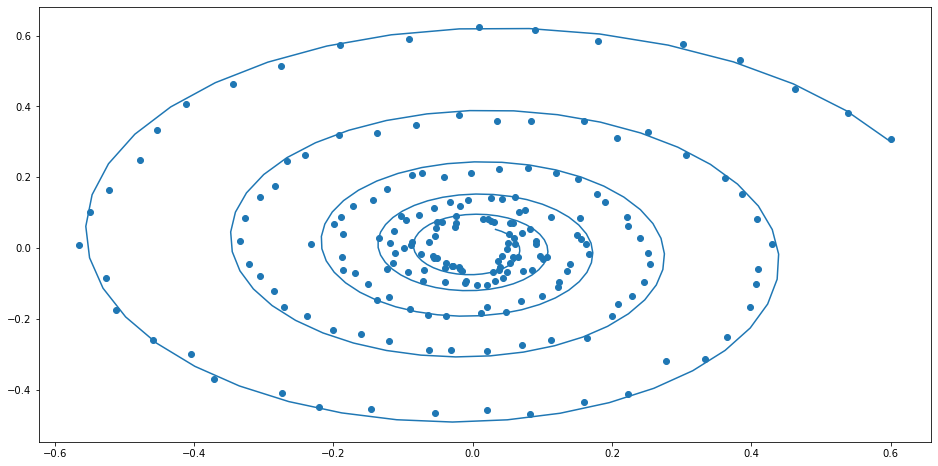

In [38]:
conduct_experiment(ode_true, ode_trained, 500, "linear")

In [ ]:
class TestODEF(ODEF):
    def __init__(self, A, B, x0):
        super(TestODEF, self).__init__()
        self.A = nn.Linear(2, 2, bias=False)
        self.A.weight = nn.Parameter(A)
        self.B = nn.Linear(2, 2, bias=False)
        self.B.weight = nn.Parameter(B)
        self.x0 = nn.Parameter(x0)

In [79]:
class FunctionExample(ODEF):
    def __init__(self):
        super(FunctionExample, self).__init__(Tensor([[15, 3], [3, 19]]))

In [39]:
ode_true = NeuralODE(CenterFunctionExample())
ode_trained = NeuralODE(RandomLinearODEF())

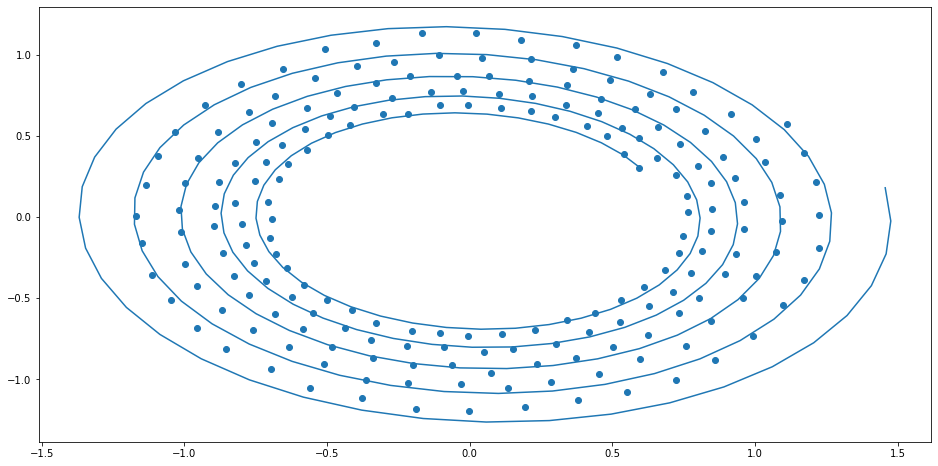

In [40]:
conduct_experiment(ode_true, ode_trained, 300, "linear")

In [ ]:
class NNODEF(ODEF):
    def __init__(self, in_dim, hid_dim, time_invariant=False):
        super(NNODEF, self).__init__()
        self.time_invariant = time_invariant

        if time_invariant:
            self.lin1 = nn.Linear(in_dim, hid_dim)
        else:
            self.lin1 = nn.Linear(in_dim+1, hid_dim)
        self.lin2 = nn.Linear(hid_dim, hid_dim)
        self.lin3 = nn.Linear(hid_dim, in_dim)
        self.elu = nn.ELU(inplace=True)

    def forward(self, x, t):
        if not self.time_invariant:
            x = torch.cat((x, t), dim=-1)

        h = self.elu(self.lin1(x))
        h = self.elu(self.lin2(h))
        out = self.lin3(h)
        return out

In [ ]:
func = TestODEF(Tensor([[-0.1, -0.5], [0.5, -0.1]]), Tensor([[0.2, 1.], [-1, 0.2]]), Tensor([[-1., 0.]]))
ode_true = NeuralODE(func)

func = NNODEF(2, 16, time_invariant=True)
ode_trained = NeuralODE(func)

In [ ]:
conduct_experiment(ode_true, ode_trained, 3000, "comp", plot_freq=30)

In [ ]:
!pip install torchdiffeq

In [44]:
from torchdiffeq import odeint_adjoint as odeint

In [45]:
import os
import argparse
import time
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
device = torch.device('cpu')
true_y0 = torch.tensor([[2., 0.]]).to(device)
t = torch.linspace(0., 25., 100).to(device)
true_A = torch.tensor([[-0.1, 2.0], [-2.0, -0.1]]).to(device)

class Lambda(nn.Module):

    def forward(self, t, y):
        return torch.mm(y**3, true_A)



In [46]:
data = np.array(odeint(Lambda(), true_y0, t))
data

array([[[ 2.        ,  0.        ]],

       [[-0.00421388,  1.8399086 ]],

       [[-1.7133248 ,  0.4456788 ]],

       [[-1.1133392 , -1.5113926 ]],

       [[ 0.7768144 , -1.4924022 ]],

       [[ 1.4486814 , -0.3302357 ]],

       [[ 1.2581776 ,  1.033948  ]],

       [[ 0.19111006,  1.3279991 ]],

       [[-0.881676  ,  1.1949444 ]],

       [[-1.2300255 ,  0.42582476]],

       [[-1.1824147 , -0.4700525 ]],

       [[-0.8368998 , -1.0681453 ]],

       [[-0.12387507, -1.1223487 ]],

       [[ 0.551529  , -1.0703949 ]],

       [[ 0.9841505 , -0.766655  ]],

       [[ 1.0370989 , -0.21169698]],

       [[ 1.0076263 ,  0.32968283]],

       [[ 0.87859064,  0.774313  ]],

       [[ 0.513026  ,  0.9507074 ]],

       [[ 0.0723135 ,  0.94847906]],

       [[-0.34332258,  0.92335457]],

       [[-0.6908467 ,  0.82363343]],

       [[-0.86068535,  0.5597733 ]],

       [[-0.87937707,  0.21733536]],

       [[-0.8634035 , -0.11720531]],

       [[-0.8338474 , -0.42857894]],

       [[-0.

In [47]:
x = []
y = []
for point in data:
    x.append(point[0][0])
    y.append(point[0][1])

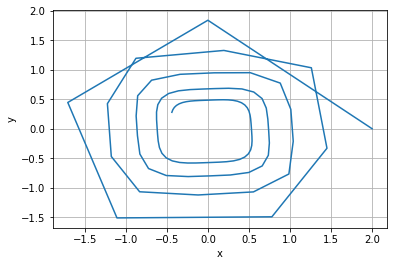

In [48]:
plt.title("") # заголовок
plt.xlabel("x") # ось абсцисс
plt.ylabel("y") # ось ординат
plt.grid()      # включение отображение сетки
plt.plot(x, y)  # построение графика